# Predicting Loan Repayment

The purpose of this project is to categorise loan applicants more accurately based on their ability to repay the loan. Moreover, it will look into the varaibles that may affect how quickly borrowers return their loans. Exploring some of the most well-known ML models will help achieve this. Finding patterns to employ on new loan takers can be done by using Machine Learning on data from prior loan borrowers. The Objective of this study is to compare the ML models that have been used in order to determine th ebest models for the data being utilised, as well as to make futire researchers job easier.

## Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import plotly.express as px

## Data Preprocessing

In [70]:
dataset = pd.read_csv('Loan Data.csv')
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
dataset.shape

(981, 13)

In [72]:
dataset.columns = ['loan_id', 'gender','married','dependents','education','self_employed','applicant_income','co-applicant_income','loan_amount','loan_amount_term', 'credit_history','property_area','loan_status']
dataset.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
dataset.isnull().sum()

loan_id                  0
gender                  24
married                  3
dependents              25
education                0
self_employed           55
applicant_income         0
co-applicant_income      0
loan_amount             27
loan_amount_term        20
credit_history          79
property_area            0
loan_status            367
dtype: int64

In [74]:
dataset.skew(axis=0, skipna=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9612\2026234508.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



applicant_income       7.086961
co-applicant_income    6.844109
loan_amount            2.714036
loan_amount_term      -2.477392
credit_history        -1.817102
dtype: float64

Here we need to consider the missing values of 'loan_amount' and 'credit_history'. As these are important for our prediction. whereas the other missing values in other columns can be neglected.

Filling the missing values in a column is completly depends on the skewness of the data. If the data is numeric and not skewed, then we can fill the missing values with 'Mean'. If the data is numeric and skewed, then we can fill the missing values with 'Median'.

In our Case, loan_amount is numeric and not skewed, so we can fill the missing values with 'Mean'

credit_history is numeric and skewed, so fill the missing values with 'Median'

In [75]:
dataset['loan_amount'] = dataset['loan_amount'].fillna(dataset['loan_amount'].mean())

In [76]:
dataset['credit_history'] = dataset['credit_history'].fillna(dataset['credit_history'].median())

Now I am dropping the rows which has null values, so axis=0 and inplace=True means that the data will modify your dataframe directly.

In [77]:
dataset.dropna(axis=0,inplace=True)

In [78]:
dataset.isnull().sum()

loan_id                0
gender                 0
married                0
dependents             0
education              0
self_employed          0
applicant_income       0
co-applicant_income    0
loan_amount            0
loan_amount_term       0
credit_history         0
property_area          0
loan_status            0
dtype: int64

In [79]:
dataset.shape

(542, 13)

In [80]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              542 non-null    object 
 1   gender               542 non-null    object 
 2   married              542 non-null    object 
 3   dependents           542 non-null    object 
 4   education            542 non-null    object 
 5   self_employed        542 non-null    object 
 6   applicant_income     542 non-null    int64  
 7   co-applicant_income  542 non-null    float64
 8   loan_amount          542 non-null    float64
 9   loan_amount_term     542 non-null    float64
 10  credit_history       542 non-null    float64
 11  property_area        542 non-null    object 
 12  loan_status          542 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 59.3+ KB


In [81]:
dataset.describe()

,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history
count,542.000000,542.000000,542.000000,542.000000,542.000000
mean,5291.911439,1590.699114,145.381401,341.955720,0.863469
std,5506.461371,2543.801628,81.751040,65.441582,0.343669
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2843.750000,0.000000,100.000000,360.000000,1.000000
50%,3848.000000,1149.000000,129.500000,360.000000,1.000000
75%,5820.500000,2281.000000,167.750000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


In [82]:
dataset

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.00000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.00000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.00000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.00000,360.0,1.0,Urban,Y


In [83]:
type(dataset['dependents'].iloc[0])

str

In [84]:
dataset['dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

LabelEncoder is used to Normalize the Labels. It can be used to transform non-numerical labels into numerical labels

In [85]:
model = LabelEncoder()

In [86]:
model.fit(dataset['dependents'])

LabelEncoder()

In [87]:
dataset['dependents'] = model.transform(dataset['dependents'])

In [88]:
type(dataset['dependents'].iloc[0])

numpy.int32

In [89]:
dataset.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y


## EDA

In [90]:
dataset[dataset['loan_status']=='Y'].count()['loan_status']

376

In [91]:
dataset[dataset['loan_status']=='N'].count()['loan_status']

166

Text(0.5, 1.0, 'Loan Status Visualization')

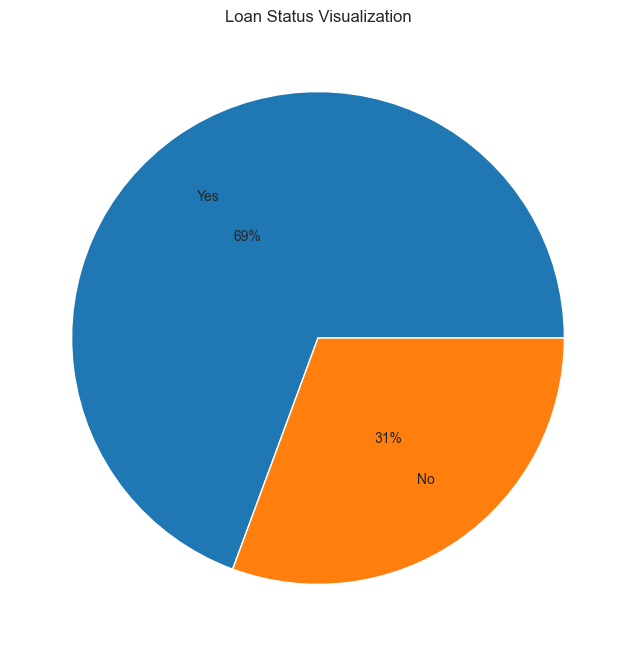

In [92]:
plt.figure(figsize=(8,8))
plt.pie(x=[376,166], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5, labeldistance=0.7)
plt.title('Loan Status Visualization')

([], [])

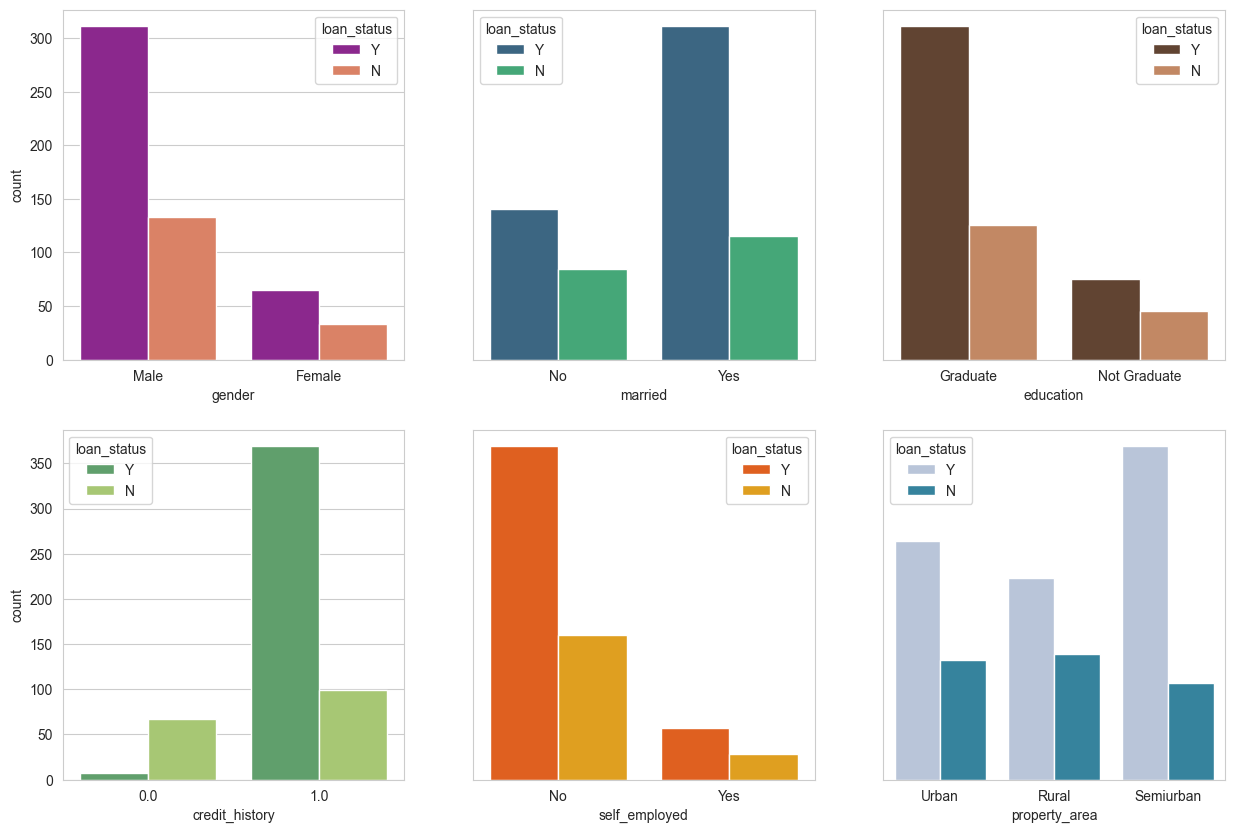

In [93]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=dataset,palette='plasma')

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=dataset,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=dataset,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=dataset,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=dataset,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',data=dataset,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

In [94]:
px.sunburst( data_frame=dataset,path=['gender','loan_status'], color='loan_amount')

([], [])

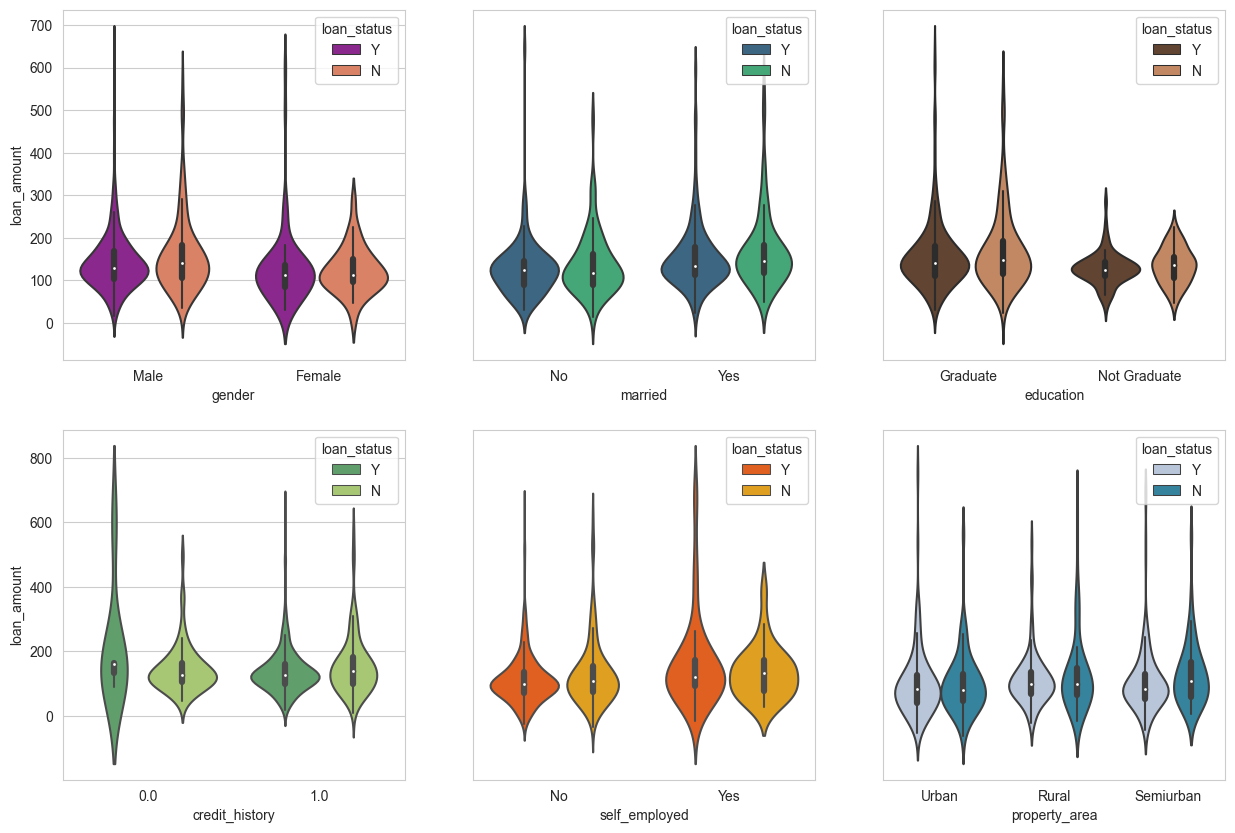

In [95]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=dataset,palette='plasma')

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=dataset,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=dataset,palette='copper')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=dataset,hue='loan_status',palette='summer')

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=dataset,palette='autumn')
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=dataset,hue='loan_status',palette='PuBuGn')
plt.ylabel(' ')
plt.yticks([ ])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9612\377151843.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9612\377151843.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9612\377151843.py:13: UserWarnin

Text(0, 0.5, 'frequency')

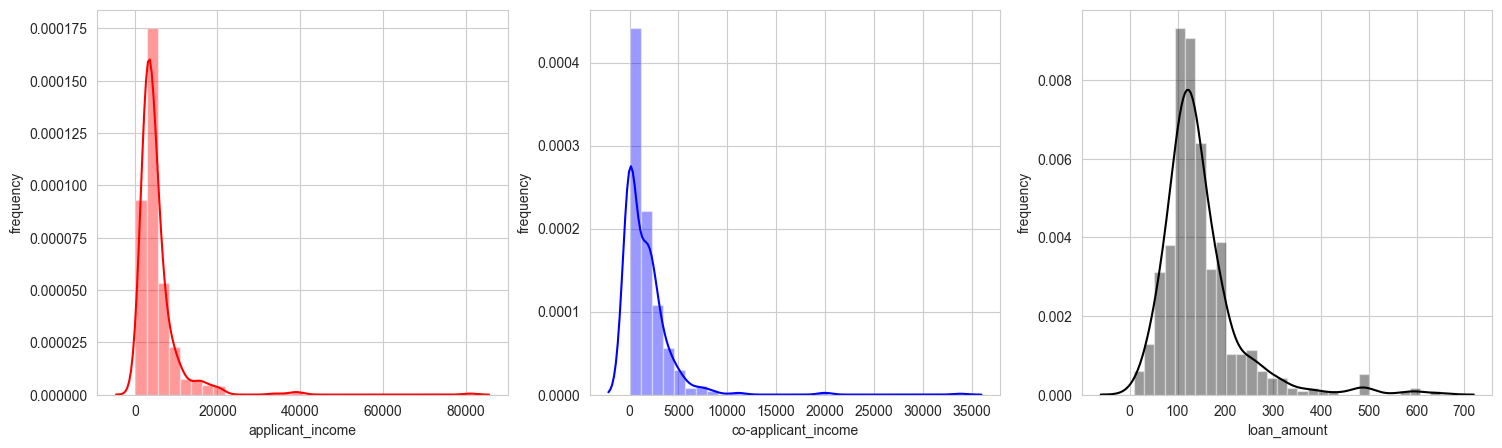

In [96]:
plt.figure(figsize=(18,5))


plt.subplot(1,3,1)
sns.distplot(dataset['applicant_income'],bins=30,color='r',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,2)
sns.distplot(dataset['co-applicant_income'],bins=30,color='blue',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

plt.subplot(1,3,3)
sns.distplot(dataset['loan_amount'],bins=30,color='black',hist_kws=dict(edgecolor='white'))
plt.ylabel('frequency')

In [97]:
px.scatter_3d(data_frame=dataset,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

## Encoding

In [98]:
model1 = LabelEncoder()
model1.fit(dataset['gender'])
dataset['gender'] = model1.transform(dataset['gender'])

In [99]:
model2 = LabelEncoder()
model2.fit(dataset['married'])
dataset['married'] = model2.transform(dataset['married'])

model3 = LabelEncoder()
model3.fit(dataset['education'])
dataset['education'] = model3.transform(dataset['education'])

model4 = LabelEncoder()
model4.fit(dataset['self_employed'])
dataset['self_employed'] = model4.transform(dataset['self_employed'])

model5 = LabelEncoder()
model5.fit(dataset['property_area'])
dataset['property_area'] = model5.transform(dataset['property_area'])


model6 = LabelEncoder()
model6.fit(dataset['loan_status'])
dataset['loan_status'] = model6.transform(dataset['loan_status'])

In [100]:
dataset.head()

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co-applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


Text(0.5, 1.0, 'Loan Status Correlation Matrix')

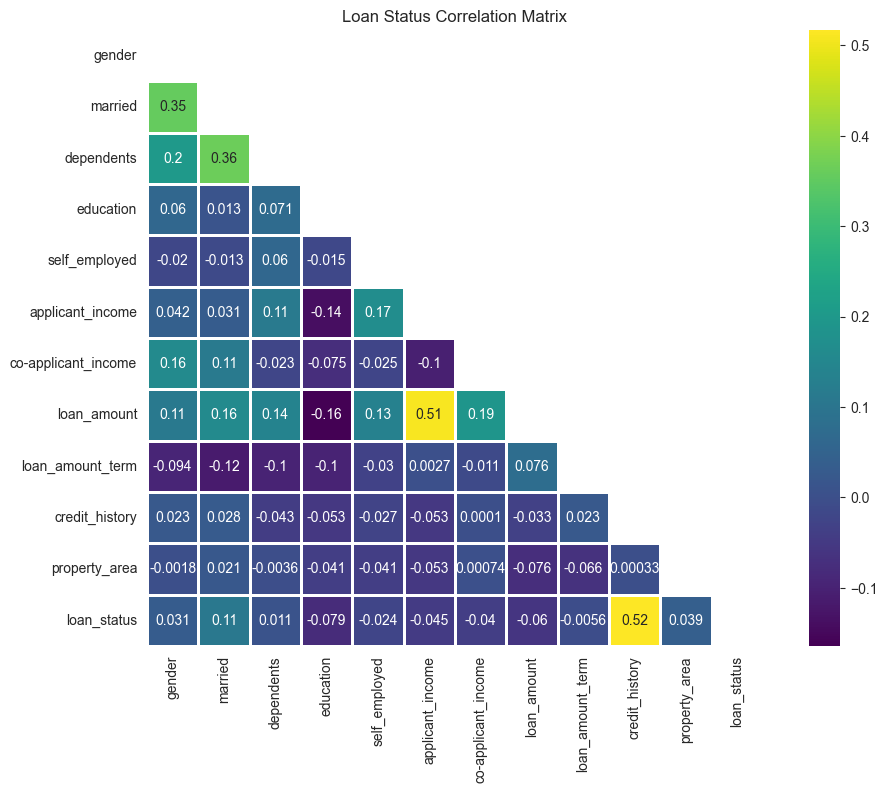

In [101]:
plt.figure(figsize=(12,8))

corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, linewidths=2, cmap='viridis')
    
plt.title('Loan Status Correlation Matrix')

Based on the above graph, the applicants credit_history is highly correlated with loan_status. Which clearly says that Credit history of the applicant is compulsory related to the status of the loan repayment

## Prediction Based on ML Algorithms

## 1. Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
X = dataset.drop(['loan_id','loan_status'],axis=1)
y = dataset['loan_status']

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [105]:
lr=LogisticRegression()

In [106]:
lr.fit(X_train, y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [107]:
lr_prediction=lr.predict(X_test)

In [108]:
print(confusion_matrix(y_test,lr_prediction))
print('\n')
print(classification_report(y_test,lr_prediction))
print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

[[10 21]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.32      0.49        31
           1       0.79      1.00      0.88        78

    accuracy                           0.81       109
   macro avg       0.89      0.66      0.68       109
weighted avg       0.85      0.81      0.77       109



Logistic Regression accuracy:  0.8073394495412844


## 2. Decision Tree

In [109]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
dt_prediction=dt.predict(X_test)

In [111]:
print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[15 16]
 [15 63]]


              precision    recall  f1-score   support

           0       0.50      0.48      0.49        31
           1       0.80      0.81      0.80        78

    accuracy                           0.72       109
   macro avg       0.65      0.65      0.65       109
weighted avg       0.71      0.72      0.71       109



Decision Tree Accuracy:  0.7155963302752294


## 3. Random Forest

In [112]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)    

RandomForestClassifier(n_estimators=200)

In [113]:
rf_prediction=rf.predict(X_test)

In [114]:
print(confusion_matrix(y_test,rf_prediction))
print('\n')
print(classification_report(y_test,rf_prediction))
print('\n')
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))

[[12 19]
 [ 5 73]]


              precision    recall  f1-score   support

           0       0.71      0.39      0.50        31
           1       0.79      0.94      0.86        78

    accuracy                           0.78       109
   macro avg       0.75      0.66      0.68       109
weighted avg       0.77      0.78      0.76       109



Random Forest Accuracy:  0.7798165137614679


## 3. KNearest Neighbors

In [115]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.3853211009174312, 0.48623853211009177, 0.4036697247706422, 0.44954128440366975, 0.43119266055045874, 0.45871559633027525, 0.3486238532110092, 0.3669724770642202, 0.3302752293577982, 0.3302752293577982, 0.3119266055045872, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.3119266055045872, 0.3211009174311927, 0.29357798165137616, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.26605504587155965, 0.26605504587155965, 0.27522935779816515, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066]


Text(0.5, 1.0, 'Elbow Method')

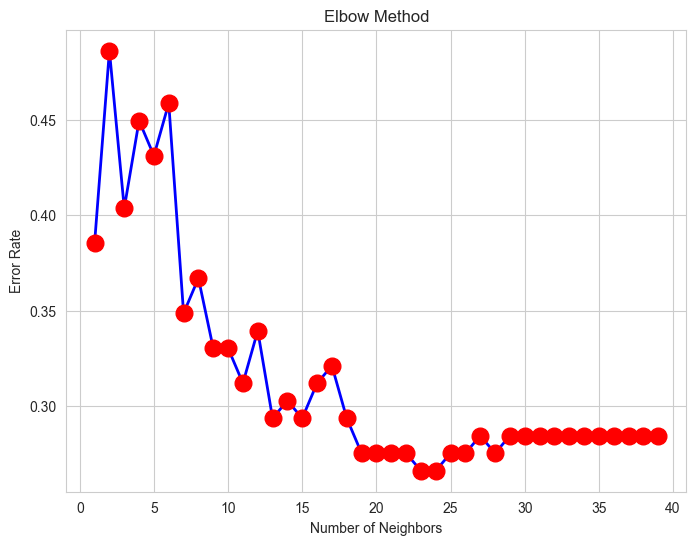

In [116]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [117]:
knn=KNeighborsClassifier(n_neighbors=23)

In [118]:
knn.fit(X_train, y_train)
knn_prediction=knn.predict(X_test)

In [119]:
print(confusion_matrix(y_test,knn_prediction))
print('\n')
print(classification_report(y_test,knn_prediction))
print('\n')
print('KNN accuracy Accuracy: ', accuracy_score(y_test,knn_prediction))

[[ 2 29]
 [ 0 78]]


              precision    recall  f1-score   support

           0       1.00      0.06      0.12        31
           1       0.73      1.00      0.84        78

    accuracy                           0.73       109
   macro avg       0.86      0.53      0.48       109
weighted avg       0.81      0.73      0.64       109



KNN accuracy Accuracy:  0.7339449541284404


## 5. Support Vector Classification

In [120]:
svc=SVC()
svc.fit(X_train, y_train)

SVC()

In [121]:
svc_prediction=svc.predict(X_test)

In [122]:
print(confusion_matrix(y_test,svc_prediction))
print('\n')
print(classification_report(y_test,svc_prediction))
print('\n')
print('SVC َAccuracy: ', accuracy_score(y_test,svc_prediction))

[[ 0 31]
 [ 1 77]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.71      0.99      0.83        78

    accuracy                           0.71       109
   macro avg       0.36      0.49      0.41       109
weighted avg       0.51      0.71      0.59       109



SVC َAccuracy:  0.7064220183486238


In [123]:
print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))
print('Random Forest Accuracy: ', accuracy_score(y_test,rf_prediction))
print('KNN Accuracy: ', accuracy_score(y_test,knn_prediction))
print('SVC Accuracy: ', accuracy_score(y_test,svc_prediction))

Logistic Regression Accuracy:  0.8073394495412844
Decision Tree Accuracy:  0.7155963302752294
Random Forest Accuracy:  0.7798165137614679
KNN Accuracy:  0.7339449541284404
SVC Accuracy:  0.7064220183486238


## Conclusion

The Loan Status is highly dependent on Credit History for Predcitons. The Logistic Regression algorithm gives us the maximum Accuracy (80%) compared to other ML Algorithms